=== DATASET OVERVIEW ===
Shape: (1301, 30)
Missing values:
pace                                  95
physic                                95
position                               2
cumulative_minutes_played            604
cumulative_games_played              604
minutes_per_game_prev_seasons        616
avg_days_injured_prev_seasons        604
avg_games_per_season_prev_seasons    604
position_numeric                       2
significant_injury_prev_season       604
cumulative_days_injured              604
season_days_injured_prev_season      604
dtype: int64

Basic Statistics:
               age  season_days_injured  fifa_rating          bmi
count  1301.000000          1301.000000  1301.000000  1301.000000
mean     26.637971            79.050730    74.513682    23.039310
std       3.937247            84.578169     5.784240     1.470255
min      17.000000             0.000000    53.000000    18.792451
25%      24.000000            24.000000    71.333333    22.093170
50%      27.000000   

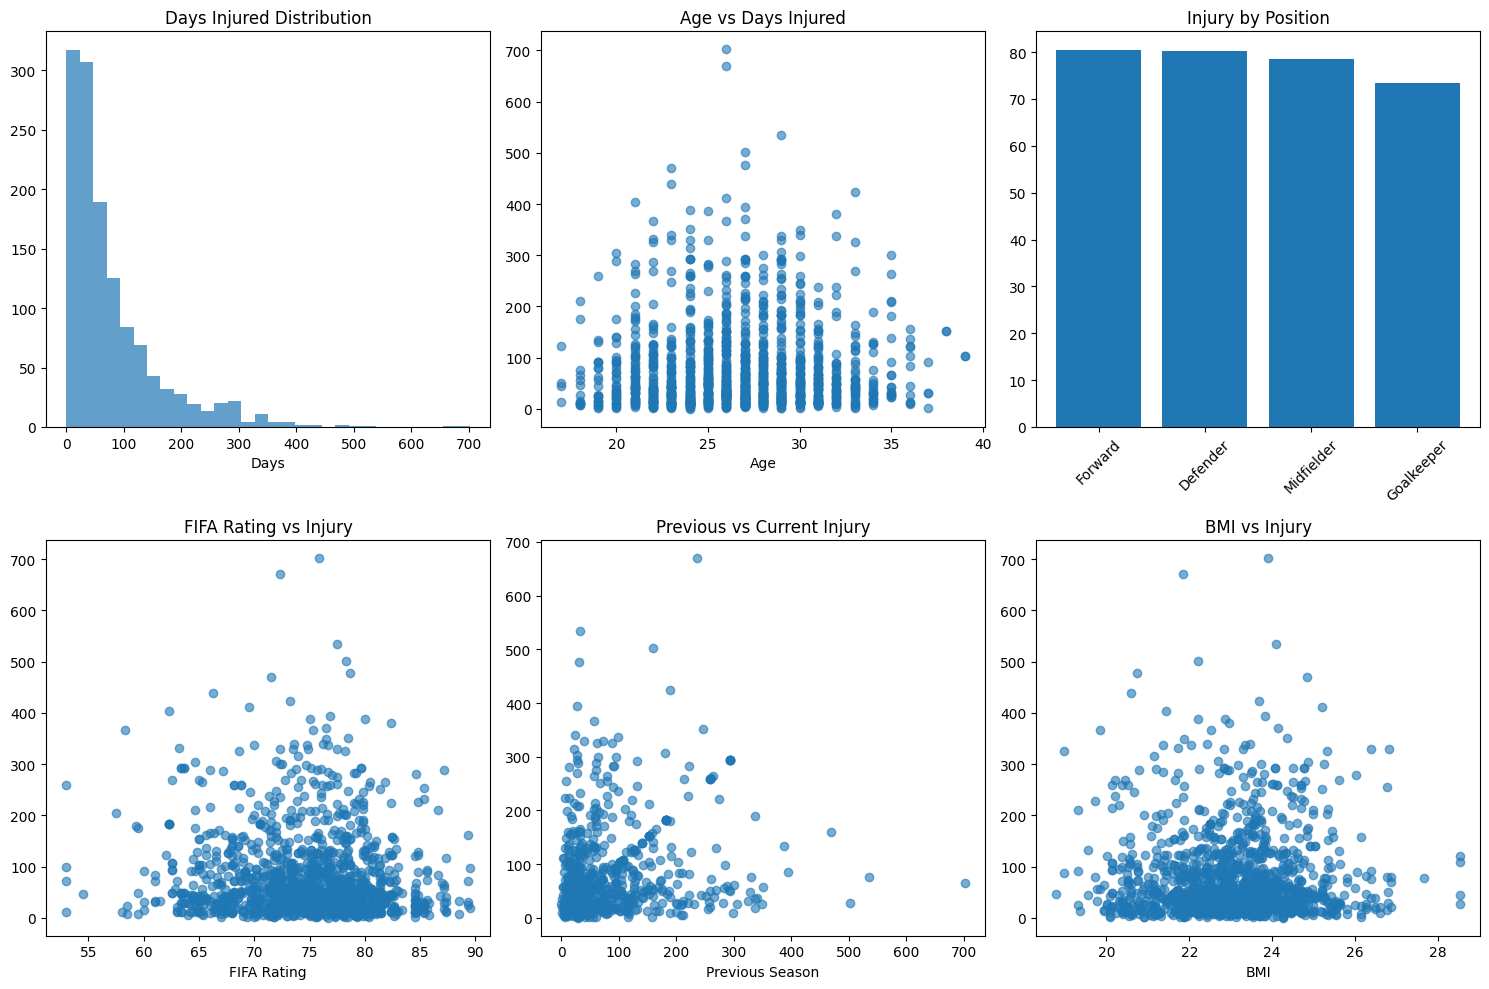

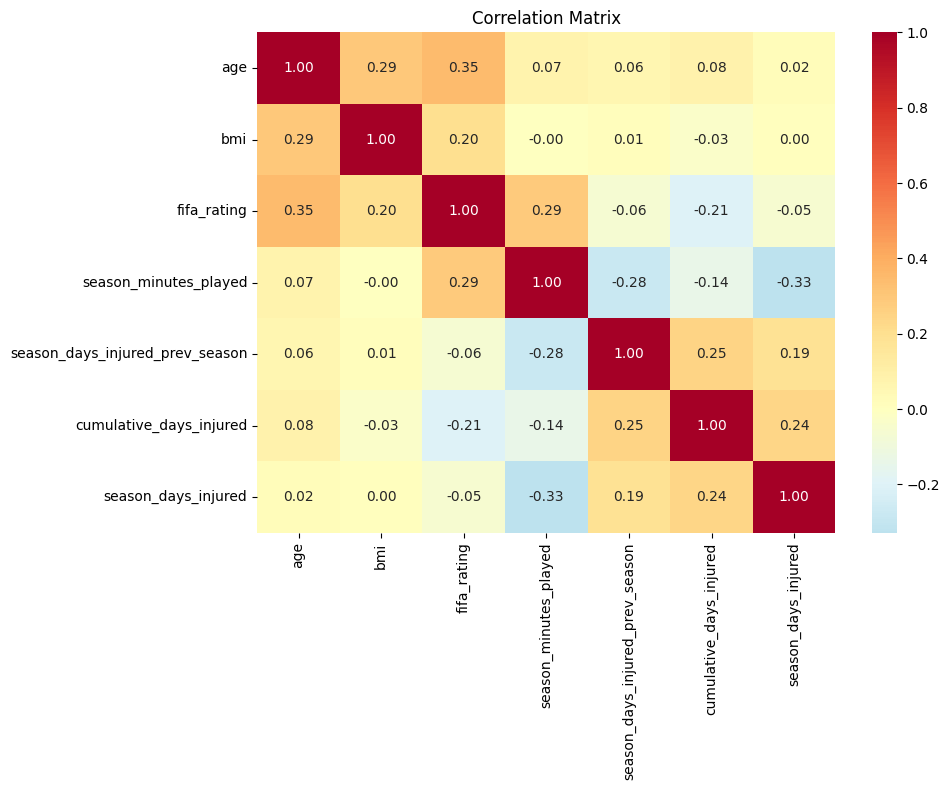


=== KEY CORRELATIONS WITH SEASON_DAYS_INJURED ===
season_minutes_played: 0.328
cumulative_days_injured: 0.240
season_days_injured_prev_season: 0.188
fifa_rating: 0.054
age: 0.022

=== KEY INSIGHTS ===
1. Dataset has 1301 player records across 5 years
2. Average injury duration: 79.1 days
3. Most injury-prone position: Forward (80.4 days avg)
4. Strongest predictor: season_minutes_played (r=0.328)
5. Age range: 17-39 years (mean: 26.6)

=== DATA QUALITY ===
Complete records: 643/1301 (49.4%)
Dataset ready for modeling!


In [1]:
# Football Injury Prediction - Concise EDA
# Dataset: Football Player Injury Data (2016-2021)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ===== 1. DATA LOADING & BASIC INFO =====
df = pd.read_csv(r"C:\Users\kmgs4\Documents\Christ Uni\trimester 4\nndl\project\dataset.csv")

print("=== DATASET OVERVIEW ===")
print(f"Shape: {df.shape}")
print(f"Missing values:\n{df.isnull().sum()[df.isnull().sum() > 0]}")
print(f"\nBasic Statistics:")
print(df[['age', 'season_days_injured', 'fifa_rating', 'bmi']].describe())

# ===== 2. TARGET VARIABLE ANALYSIS =====
target = 'season_days_injured'
print(f"\n=== TARGET ANALYSIS ({target}) ===")
print(f"Mean injury days: {df[target].mean():.2f}")
print(f"Injury rate: {(df[target] > 0).mean()*100:.1f}% of players")

# Create injury categories
df['injury_risk'] = (df[target] > df[target].median()).astype(int)
print(f"High/Low risk split: {df['injury_risk'].value_counts().values}")

# ===== 3. KEY VISUALIZATIONS =====
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Target distribution
axes[0,0].hist(df[target], bins=30, alpha=0.7)
axes[0,0].set_title('Days Injured Distribution')
axes[0,0].set_xlabel('Days')

# Age vs Injury
axes[0,1].scatter(df['age'], df[target], alpha=0.6)
axes[0,1].set_title('Age vs Days Injured')
axes[0,1].set_xlabel('Age')

# Position analysis
pos_injury = df.groupby('position')[target].mean().sort_values(ascending=False)
axes[0,2].bar(range(len(pos_injury)), pos_injury.values)
axes[0,2].set_title('Injury by Position')
axes[0,2].set_xticks(range(len(pos_injury)))
axes[0,2].set_xticklabels(pos_injury.index, rotation=45)

# FIFA Rating vs Injury
axes[1,0].scatter(df['fifa_rating'], df[target], alpha=0.6)
axes[1,0].set_title('FIFA Rating vs Injury')
axes[1,0].set_xlabel('FIFA Rating')

# Previous vs Current Injury
axes[1,1].scatter(df['season_days_injured_prev_season'], df[target], alpha=0.6)
axes[1,1].set_title('Previous vs Current Injury')
axes[1,1].set_xlabel('Previous Season')

# BMI vs Injury
axes[1,2].scatter(df['bmi'], df[target], alpha=0.6)
axes[1,2].set_title('BMI vs Injury')
axes[1,2].set_xlabel('BMI')

plt.tight_layout()
plt.show()

# ===== 4. CORRELATION ANALYSIS =====
key_features = ['age', 'bmi', 'fifa_rating', 'season_minutes_played', 
                'season_days_injured_prev_season', 'cumulative_days_injured', target]
corr_matrix = df[key_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu_r', center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

print(f"\n=== KEY CORRELATIONS WITH {target.upper()} ===")
correlations = corr_matrix[target].abs().sort_values(ascending=False)[1:6]
for feature, corr in correlations.items():
    print(f"{feature}: {corr:.3f}")

# ===== 5. SUMMARY INSIGHTS =====
print("\n=== KEY INSIGHTS ===")
print(f"1. Dataset has {df.shape[0]} player records across {df['start_year'].nunique()} years")
print(f"2. Average injury duration: {df[target].mean():.1f} days")
print(f"3. Most injury-prone position: {pos_injury.index[0]} ({pos_injury.iloc[0]:.1f} days avg)")
print(f"4. Strongest predictor: {correlations.index[0]} (r={correlations.iloc[0]:.3f})")
print(f"5. Age range: {df['age'].min()}-{df['age'].max()} years (mean: {df['age'].mean():.1f})")

# Data quality check
print(f"\n=== DATA QUALITY ===")
print(f"Complete records: {df.dropna().shape[0]}/{df.shape[0]} ({df.dropna().shape[0]/df.shape[0]*100:.1f}%)")
print("Dataset ready for modeling!")